In [1]:
from concurrent.futures import ThreadPoolExecutor
from time import strftime, gmtime

from data import load_data
from data_partitioning import training_validation_subset
from data_transformation import response_outlier_capping, log_response, predictors_one_hot_encoding, \
    store_scaling_values, scale_numerics
from modelling import bayes_cv_tuner, status_print, save_model
from prediction import scores_and_fe, predict_test, predict_holdout

In [2]:
# hardcoded settings
current_time = strftime("%Y%m%d%H%M%S", gmtime())

In [3]:
# load data
training_df, holdout_df, test_df = load_data()
print('dataset loaded...')

dataset loaded...


In [4]:
# data partitioning
training_df, validation_df=training_validation_subset(training_df)
print('dataset partitioned...')

Training dataset rows:	 112001
Validation dataset rows:	 48000
dataset partitioned...


In [5]:
# encode features
training_df=predictors_one_hot_encoding(training_df)
training_df=response_outlier_capping(training_df, 'loss', 2.2)
training_df=log_response(training_df, 'loss')
store_scaling_values(training_df)
scale_numerics(training_df)
print('dataset encoded...')

Skewness of untransformed response:	1.4027929940949755
Skewness of transformed response:	-0.04847135287071736
dataset encoded...


In [6]:
# feature set
X=training_df.drop(['id', 'loss'], axis=1)
y=training_df['loss']
print('feature set selected...')

feature set selected...


In [ ]:
# fit (and save) the model
xgb_bo = bayes_cv_tuner.fit(X, y, callback=status_print)
save_model(xgb_bo.best_estimator_,current_time)
print('modelling complete...')

Model #1
Best Result: -0.4511
Best params: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('gamma', 0.24877801005599337), ('learning_rate', 0.042815319280763466), ('max_delta_step', 13), ('max_depth', 21), ('min_child_weight', 2), ('n_estimators', 87), ('reg_alpha', 5.497557739289786e-07), ('subsample', 0.6513136724634089)])

Model #2
Best Result: -0.4259
Best params: OrderedDict([('colsample_bylevel', 0.8390144719977516), ('colsample_bytree', 0.8844821246070537), ('gamma', 5.378869267509367e-07), ('learning_rate', 0.7988179462781242), ('max_delta_step', 17), ('max_depth', 3), ('min_child_weight', 1), ('n_estimators', 68), ('reg_alpha', 0.0005266983003701547), ('subsample', 0.9539453486878958)])

Model #3
Best Result: -0.4259
Best params: OrderedDict([('colsample_bylevel', 0.8390144719977516), ('colsample_bytree', 0.8844821246070537), ('gamma', 5.378869267509367e-07), ('learning_rate', 0.7988179462781242), ('max_delta_step', 17), ('max

Training:	 0.4085824816701411
Validation:	 0.4345076202637106
modelling scores created...


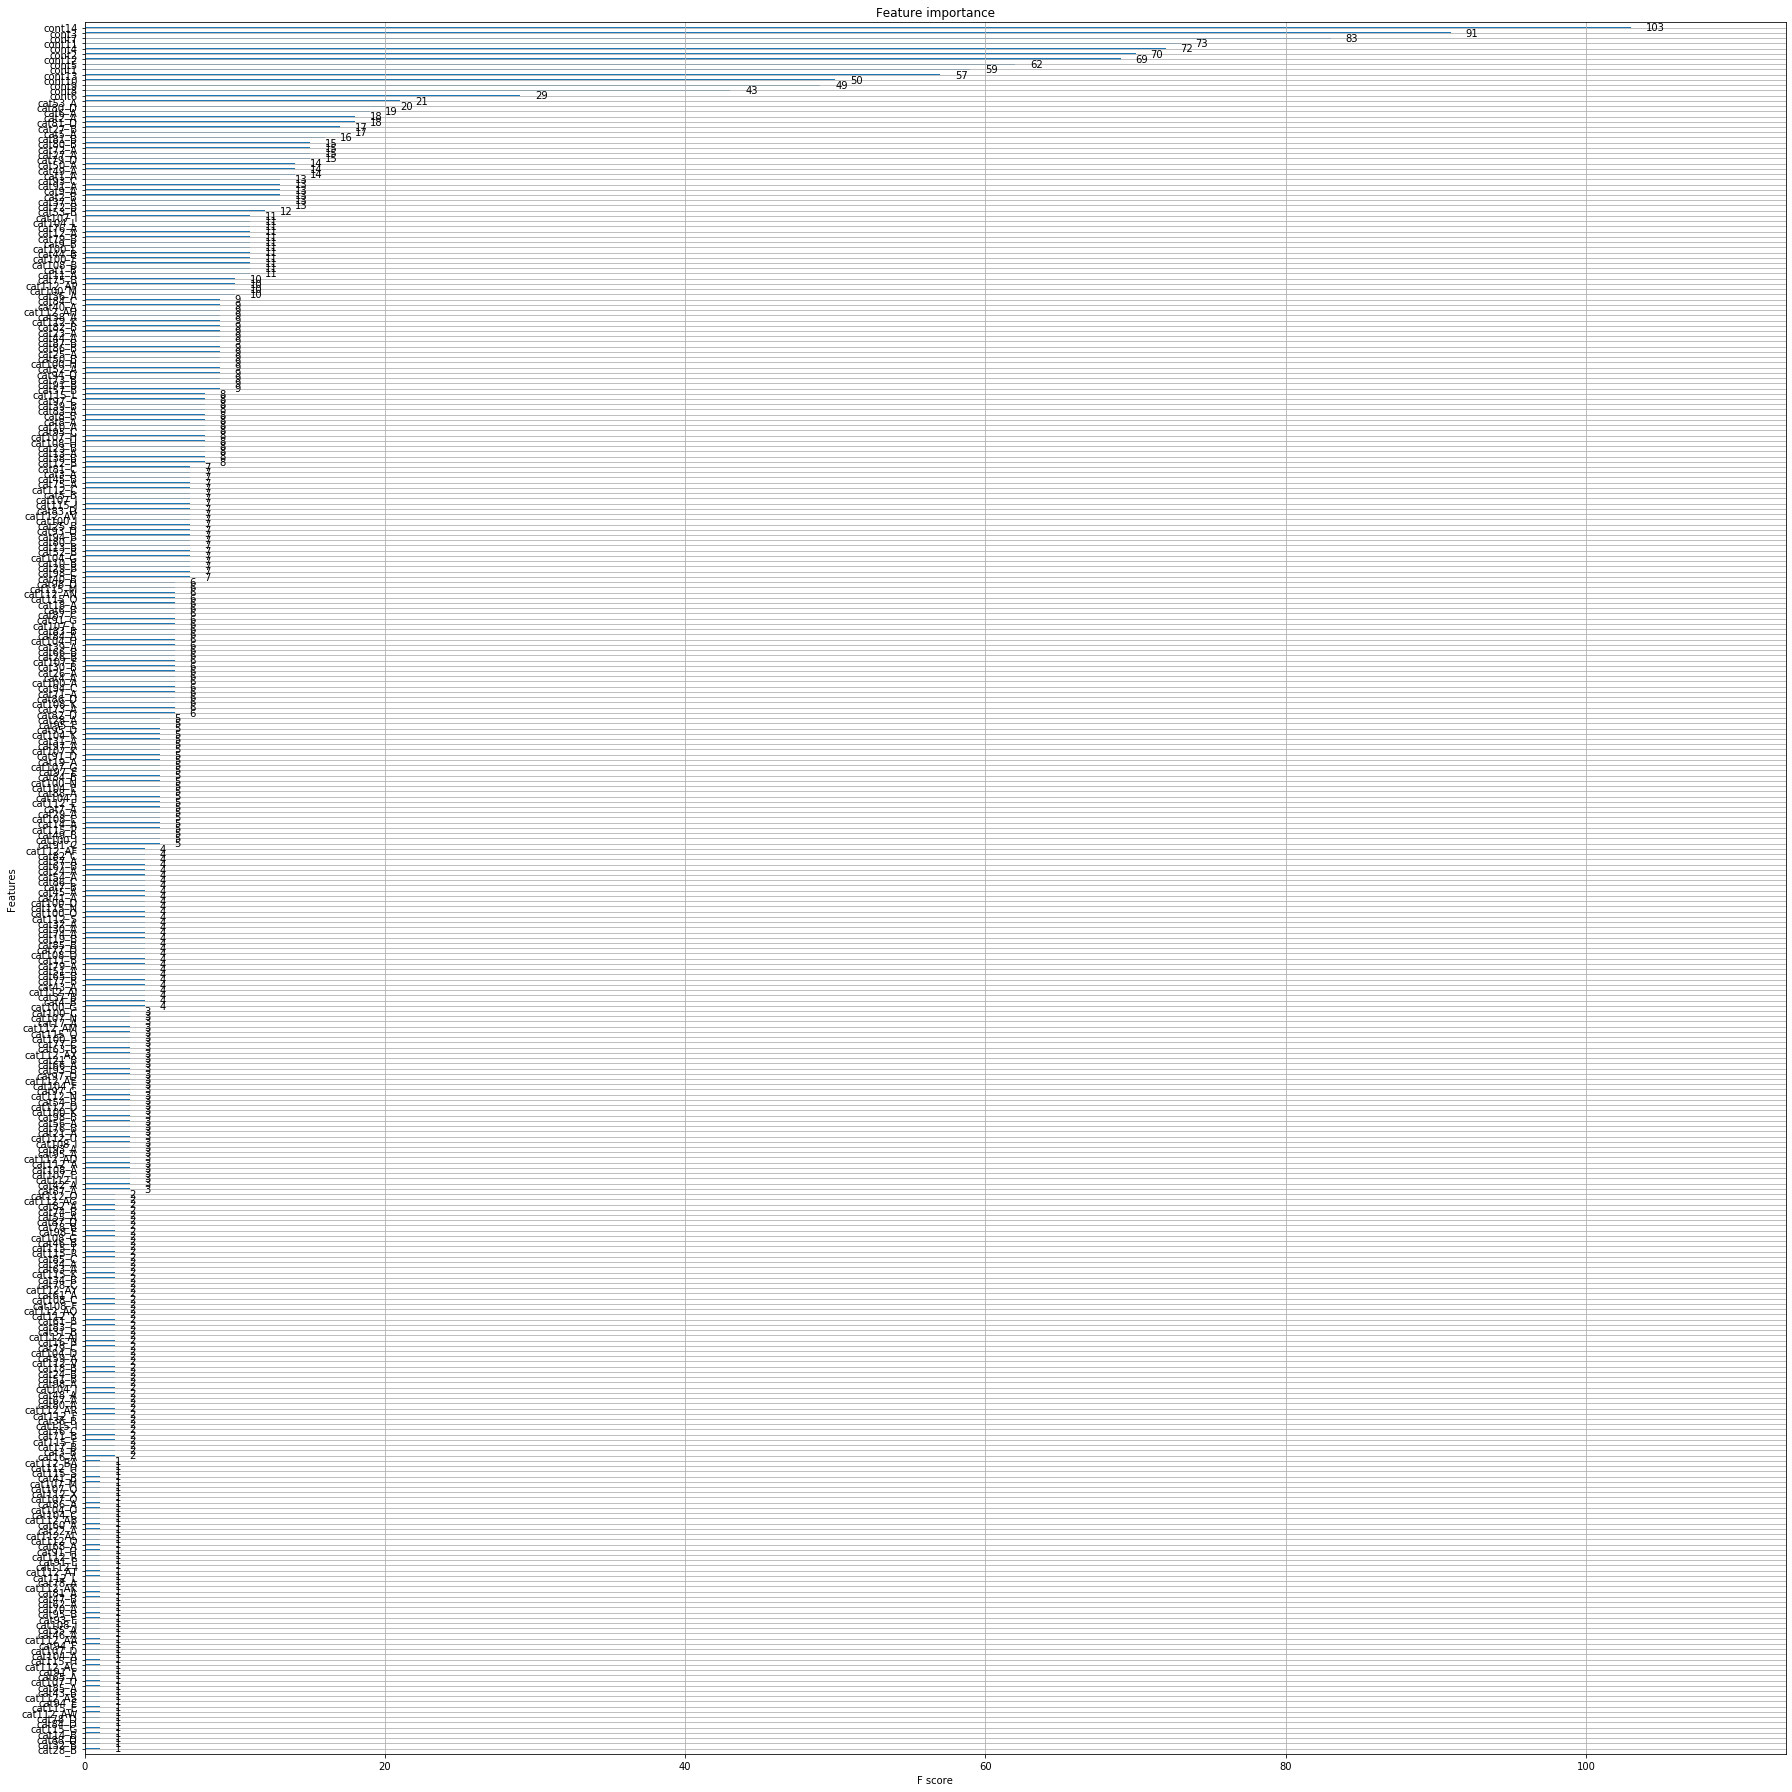

In [ ]:
# scores and feature importance
scores_and_fe(X, y, training_df, validation_df, xgb_bo.best_estimator_, current_time)
print('modelling scores created...')

In [ ]:
# predict on test and holdout dataset
predict_test(training_df, test_df, xgb_bo.best_estimator_, current_time)
predict_holdout(training_df, holdout_df, xgb_bo.best_estimator_, current_time)
print('predictions complete...')

predictions complete...
